In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [2]:
for i in range(8):
    if i==0:
        train = pd.read_csv('salida/resultados/RTE3/presentacion/DEV_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/presentacion/DEV_'+str(i+1)+'.csv.csv')
        train=pd.concat([train,temp])

<Axes: title={'center': 'antonimos'}, xlabel='CLASS'>

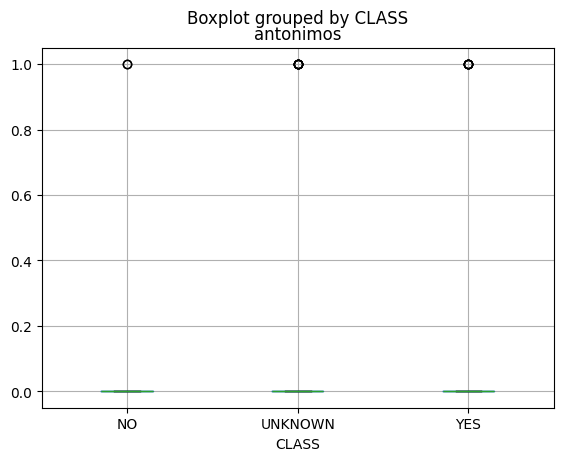

In [3]:
train.boxplot(by="CLASS",column=["antonimos"])

In [4]:
train=train.drop(["antonimos","sim_faltantes","distancias","suma"],axis=1)
train

,entropias,mutual_info,m_earth,max_info_p,relaciones,CLASS
0,0.000,0.000000,0.000000,0.000000,0,YES
1,1.584,1.412555,8.697627,0.467034,5,NO
2,2.986,1.415133,5.036993,1.305065,1,UNKNOWN
3,0.000,0.000000,0.000000,0.000000,0,YES
4,1.530,0.716918,0.978448,0.231184,0,YES
...,...,...,...,...,...,...
95,2.055,0.703017,0.616965,0.424818,0,UNKNOWN
96,0.000,0.000000,0.000000,0.000000,0,YES
97,0.000,0.000000,0.000000,0.000000,0,UNKNOWN
98,0.000,0.000000,0.000000,0.000000,0,NO


In [5]:
X = train.drop(['CLASS'],axis=1)
y_ = train['CLASS']

In [6]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [7]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

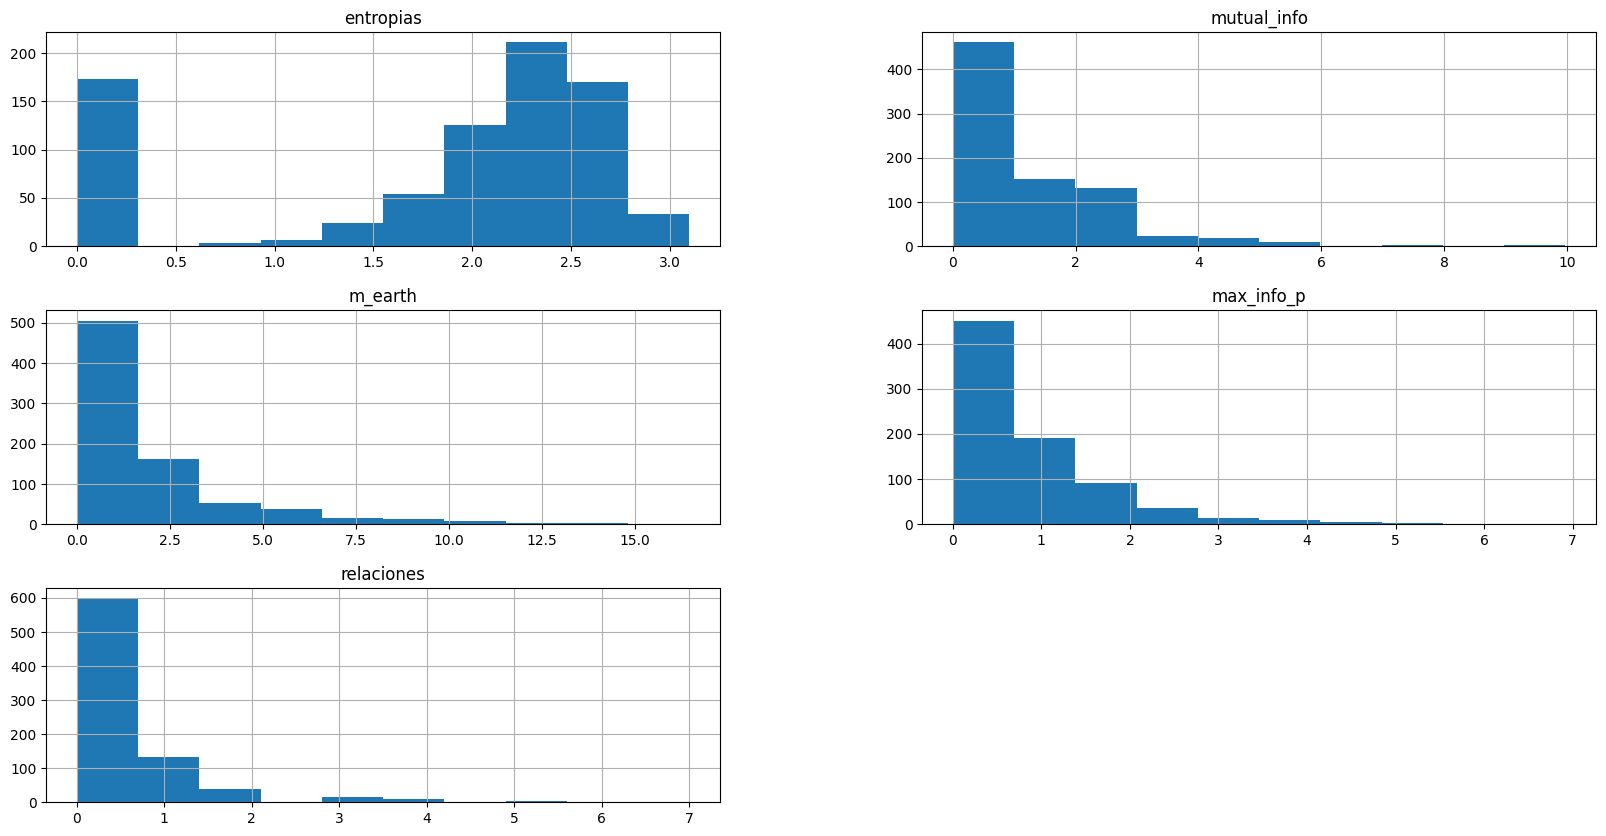

In [8]:
train.hist(figsize=(20,10))
plt.show()

In [9]:
for i in range(8):
    if i==0:
        test = pd.read_csv('salida/resultados/RTE3/presentacion/TEST_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/presentacion/TEST_'+str(i+1)+'.csv.csv')
        test=pd.concat([test,temp])

In [10]:
#test["relaciones"]=test["relaciones"]+test["antonimos"]

In [11]:
test=test.drop(["antonimos","sim_faltantes","distancias","suma"],axis=1)
test

,entropias,mutual_info,m_earth,max_info_p,relaciones,CLASS
0,2.093,1.415909e+00,7.061271,0.919573,0,YES
1,2.149,7.099558e-01,0.701502,0.393066,0,YES
2,0.000,1.609823e-13,4.289287,0.000000,0,YES
3,0.000,0.000000e+00,0.000000,0.000000,0,YES
4,2.468,6.870561e-01,0.973838,0.412710,0,NO
...,...,...,...,...,...,...
95,1.864,7.052404e-01,1.067078,0.276587,1,YES
96,0.000,0.000000e+00,0.000000,0.000000,0,NO
97,2.208,6.977210e-01,0.589826,0.467463,0,UNKNOWN
98,1.549,6.852396e-01,1.010164,0.353093,0,UNKNOWN


In [12]:
X_t = test.drop(['CLASS'],axis=1)
y_t = test['CLASS']

In [13]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    else:
        y_test.append(0)

In [14]:
scaler = preprocessing.StandardScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [15]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [16]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [17]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [18]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [19]:
model.decision_function(X)

array([ 9.30043747e-01, -4.29258222e-01,  2.63780253e-01,  9.30043747e-01,
        1.54868046e-01,  5.78890298e-01,  9.30043747e-01,  9.30043747e-01,
        6.59667781e-02, -9.51910588e-01,  2.05223692e-01,  9.30043747e-01,
        2.27949360e-01,  3.72788282e-01,  5.69028605e-01,  9.30043747e-01,
       -3.57630915e-01,  3.31797391e-01,  4.23544179e-01,  3.32005838e-01,
        4.81904467e-01,  2.21083358e-01,  5.58377045e-01,  3.95381138e-01,
       -9.54593025e-02,  2.02508795e-01,  2.75559123e-01,  2.94782496e-01,
        3.04548917e-01,  3.82561179e-01,  4.09085325e-01,  3.20041727e-01,
        2.56054890e-01,  3.22147202e-01,  3.66851338e-01,  2.07372741e-01,
        3.19495189e-01,  5.49296881e-01,  3.13468678e-01,  9.30043747e-01,
        3.61383091e-01,  2.84773615e-01, -6.27748982e-01,  4.01847921e-01,
        3.35276667e-01,  4.12550490e-01,  3.19720884e-01,  4.49845804e-01,
        3.57618989e-01,  4.23705740e-01,  2.59726328e-02,  4.78985286e-01,
       -8.22206607e-01,  

In [20]:
labels=train.columns[:-1]
labels

Index(['entropias', 'mutual_info', 'm_earth', 'max_info_p', 'relaciones'], dtype='object')

In [21]:
model.classes_

array([0, 1])

In [22]:
model.coef_[0]

array([-0.08273856, -1.65057061,  0.23596859,  0.71733077, -0.11050576])

In [23]:
coeficientes=model.coef_[0]

In [24]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  3 max_info_p 1 mutual_info


In [25]:
n_columns=train.shape[1]-1

In [26]:
n_columns

5

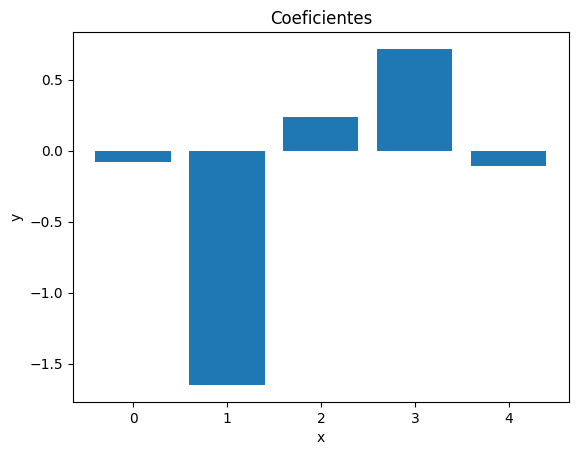

In [27]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [28]:
predictions = model.predict(X_test)

In [29]:
print(confusion_matrix(y_test, predictions))

[[187 203]
 [122 288]]


In [30]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.59
precision:  0.59
recall 0.7
f1_score:  0.64
matthews_score:  0.19


In [31]:
X_train.shape

(800, 5)

In [32]:
X_test.shape

(800, 5)

In [33]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [34]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [35]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.600000 (0.058242)
Logistic Regression: 0.730000 (0.080697)
Logistic Regression: 0.660000 (0.050624)


In [36]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.230000 (0.096307)


In [37]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [38]:
#linear_model

In [39]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [68]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.61      0.48      0.54       390
           1       0.59      0.70      0.64       410

    accuracy                           0.59       800
   macro avg       0.60      0.59      0.59       800
weighted avg       0.60      0.59      0.59       800



In [41]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [42]:
explainer.expected_value

-0.09102373882666492

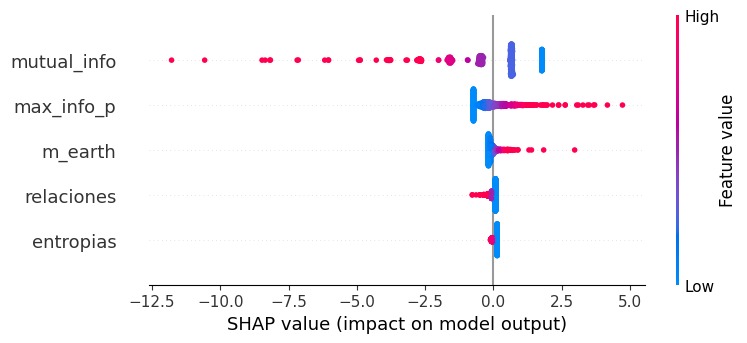

In [43]:
shap.plots.beeswarm(shap_values)

[ 0.09626086  0.41656279  2.25268127 -0.37350631 -0.47890661] 0 0


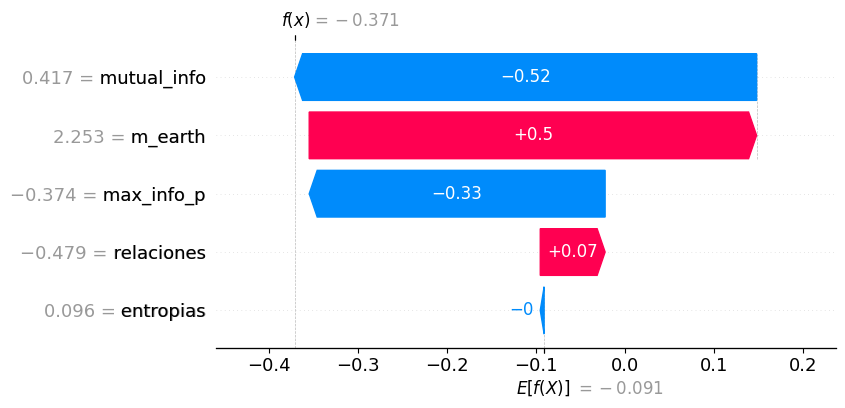

In [91]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

In [ ]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

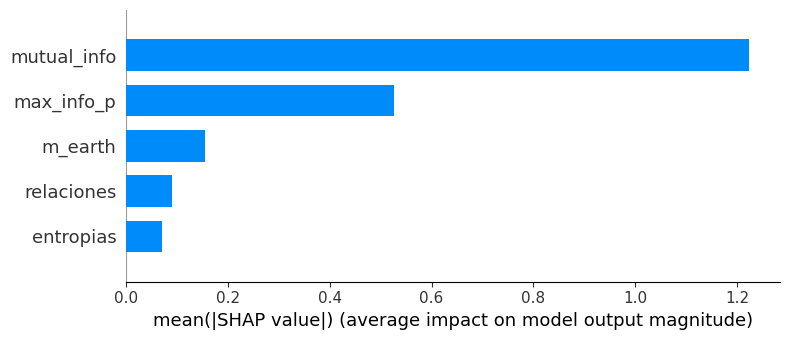

In [45]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

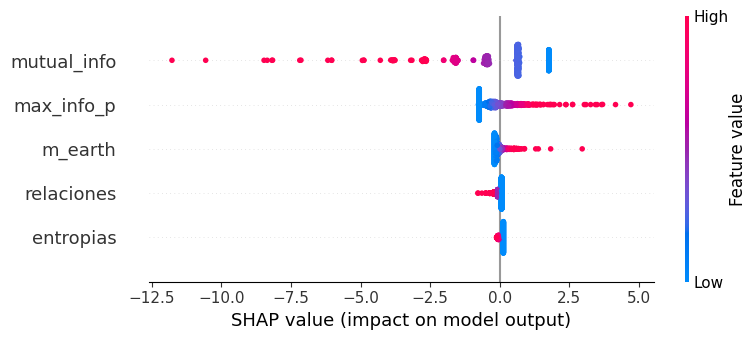

In [46]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

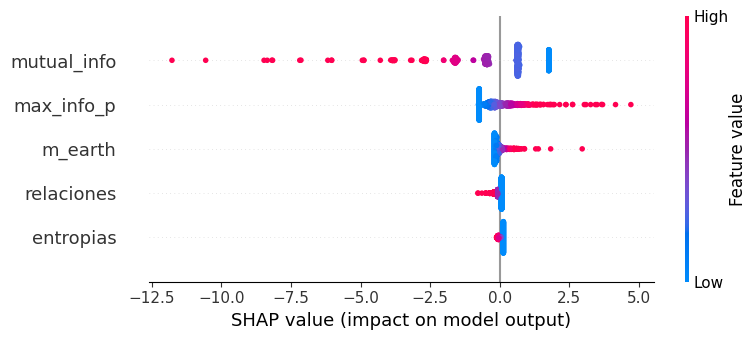

In [47]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [48]:
shap_values[2:,]

.values =
array([[ 0.13584715,  1.77097527,  0.2518053 , -0.73109659,  0.07291653],
       [ 0.13584715,  1.77097527, -0.18243115, -0.73109659,  0.07291653],
       [-0.06262164,  0.67542119, -0.08384232, -0.33093771,  0.07291653],
       ...,
       [-0.04171326,  0.65841535, -0.12271865, -0.27784931,  0.07291653],
       [ 0.01128144,  0.67831776, -0.08016471, -0.38874087,  0.07291653],
       [ 0.13584715,  1.77097527, -0.18243115, -0.73109659,  0.07291653]])

.base_values =
array([-0.09102374, -0.09102374, -0.09102374, -0.09102374, -0.09102374,
       -0.09102374, -0.09102374, -0.09102374, -0.09102374, -0.09102374,
       -0.09102374, -0.09102374, -0.09102374, -0.09102374, -0.09102374,
       -0.09102374, -0.09102374, -0.09102374, -0.09102374, -0.09102374,
       -0.09102374, -0.09102374, -0.09102374, -0.09102374, -0.09102374,
       -0.09102374, -0.09102374, -0.09102374, -0.09102374, -0.09102374,
       -0.09102374, -0.09102374, -0.09102374, -0.09102374, -0.09102374,
       -0.091

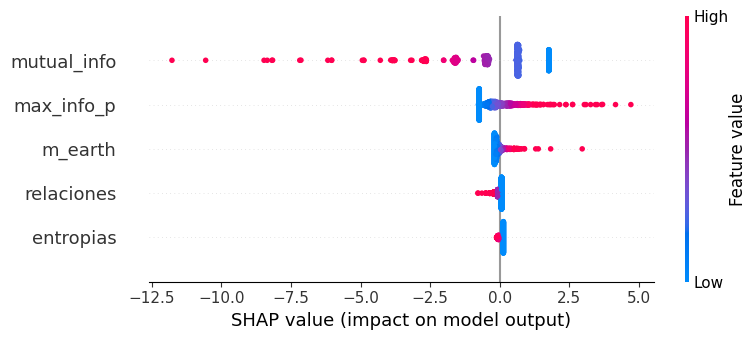

In [49]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [50]:
explainer.expected_value

-0.09102373882666492

In [51]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [52]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [53]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [54]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.57
precision:  0.58
recall 0.6
f1_score:  0.59
matthews_score:  0.14


In [55]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [56]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.560000 (0.076732)
DecisionTree: 0.640000 (0.079376)
DecisionTree: 0.580000 (0.073184)


In [57]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[211, 179],
       [163, 247]])

Profundidad del árbol: 24
Número de nodos terminales: 333


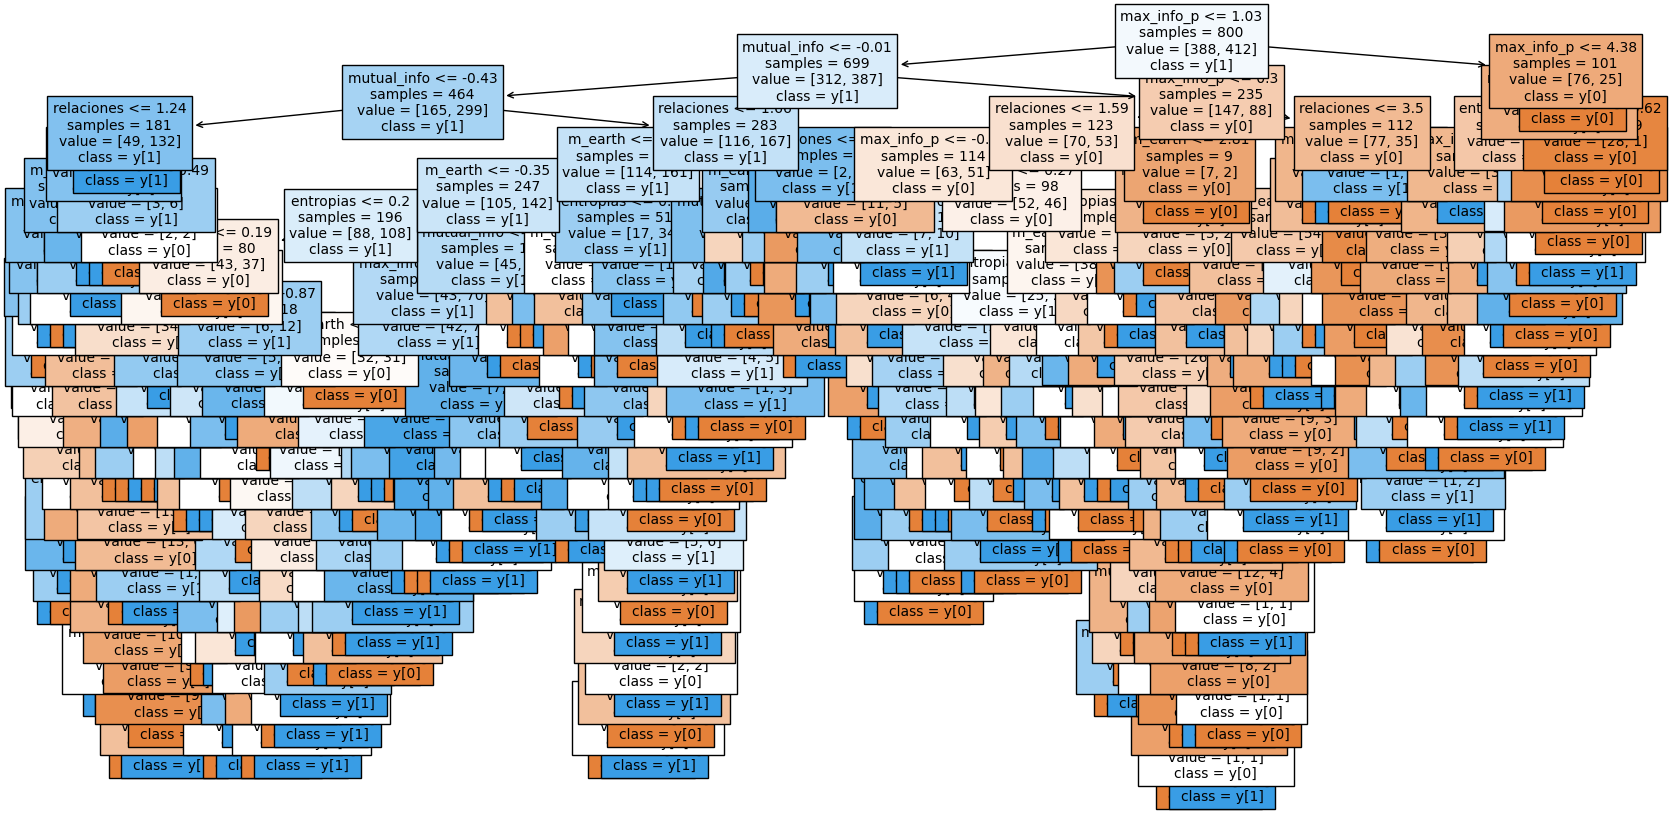

In [58]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )